# Stratégies moyennes mobiles

Prise d'une position short quand la moyenne rapide passe en dessous de celle lente et une position long dans le scénario inverse. Tout le portefeuille est investi à chaque trade.

## 1. Croisement des moyennes 8 et 13 jours


### 1.1 Crypto-monnaies


In [74]:
from MCF import MA_CROSS
import pandas as pd

cryptoList = pd.read_csv("crypto_tickers.csv", sep=";")
cryptoList = cryptoList.iloc[:, 0]

df, df2, fig = MA_CROSS(cryptoList, 8, 13, "2000-01-01", 
                                       "2020-04-15", ma="exp", 
                                       showplot=False, shortLong="both", 
                                       capital=1_000_000)



###  Table des résultats :

In [75]:
df

,From,To,Ticker,Number of Trades,Winning Trades,Losing Trades,Largest Winning Trade,Largest Losing Trade,% Profitable,Expectancy,Total Realized Return,Buy & Hold Return,Asset Return %,Strategy Return %,Strategy Max Drawdown,Asset Max Drawdown,Open position,Open Trade P/L,Total Return,Strategy Annualized Volatility,Asset Annualized Volatility,Used Stop-Loss,Used Stop-Gain,Asset Sharpe Ratio,Market Exposure,Strategy Sharpe Ratio,Asset Daily Avg Volume,Avg Holding Days,Initial Capital,Final Capital,Asset Annualized Return %,Strategy Annualized Return %
1,2015-08-06,2020-04-16,ETH-USD,74,30,44,728.696,-209.22,0.4054,20.9154,3.10854e+09,5.40655e+07,54.0655,3108.54,-0.449661,-0.939625,145.219,1.59073e+08,3.10854e+09,0.978589,1.13655,0,0,0.517835,0.952742,0.841074,3.08568e+09,22,1000000,3.10954e+09,0.802818,2.26221
2,2014-09-16,2020-04-16,XRP-USD,92,36,56,1.6478,-0.2051,0.3913,0.0312154,1.1157e+08,3.21148e+07,32.1148,111.57,-0.509742,-0.958661,0.174563,2.71356e+06,1.1157e+08,1.05065,1.0456,0,0,0.413003,0.98528,0.429656,5.52385e+08,22,1000000,1.1257e+08,0.541529,0.793328
3,2017-07-22,2020-04-16,BCH-USD,47,22,25,1001.12,-473.91,0.4681,36.6747,1.27614e+07,-487133,-0.487133,12.7614,-0.601682,-0.980279,-221.97,627752,1.27614e+07,1.19822,1.26631,0,0,-0.13419,0.973948,-0.168977,1.37509e+09,21,1000000,1.37614e+07,-0.155159,0.938733
4,2014-09-16,2020-04-16,LTC-USD,97,26,71,184.207,-50.952,0.268,3.68906,2.90229e+07,6.73613e+06,6.73613,29.0229,-0.510441,-0.934519,-39.1336,0,2.90229e+07,0.921505,0.913242,0,0,0.275887,0.972031,0.31124,8.65803e+08,20,1000000,3.00229e+07,0.287854,0.522958
5,2017-06-30,2020-04-16,EOS-USD,38,13,25,9.544,-3.2335,0.3421,0.42001,1.71264e+07,1.37329e+06,1.37329,17.1264,-0.372036,-0.919082,2.36272,202941,1.71264e+07,1.15575,1.29963,0,0,0.163575,0.973529,0.0433168,1.38766e+09,26,1000000,1.81264e+07,0.238038,1.04586
6,2017-07-24,2020-04-16,BNB-USD,47,19,28,13.9725,-2.7894,0.4043,1.11525,1.88763e+07,1.36176e+08,136.176,18.8763,-0.507371,-0.801024,13.0666,2.21508e+06,1.88763e+07,1.08182,1.23956,0,0,1.00459,0.957831,0.640465,1.47245e+08,20,1000000,1.98763e+07,2.47342,1.13056
7,2014-09-16,2020-04-16,XLM-USD,116,34,82,0.4434,-0.1518,0.2931,0.00459409,1.51596e+07,1.38723e+07,13.8723,15.1596,-0.507717,-0.962687,0.0419431,1.44276e+06,1.51596e+07,1.184,1.18059,0,0,0.2819,0.966634,0.328471,8.80312e+07,17,1000000,1.61596e+07,0.396257,0.410663
8,2017-09-12,2020-04-16,TRX-USD,54,16,38,0.0726,-0.0164,0.2963,0.0016958,1.78203e+06,5.09626e+06,5.09626,1.78203,-0.656803,-0.960138,0.0119052,49534,1.78203e+06,1.41117,1.49063,0,0,0.322612,0.983087,0.273345,5.16435e+08,17,1000000,2.78203e+06,0.61856,0.313322
9,2017-09-30,2020-04-16,ADA-USD,37,17,20,0.5944,-0.0193,0.4595,0.0326303,5.10015e+07,269297,0.269297,51.0015,-0.437679,-0.978494,0.0322949,-968007,5.10015e+07,1.24054,1.24784,0,0,0.0510283,0.969828,0.0449334,1.12433e+08,24,1000000,5.20015e+07,0.0668977,1.92407
10,2017-09-19,2020-04-16,LINK-USD,49,18,31,1.5509,-0.5612,0.3673,0.0844861,382646,1.5344e+07,15.344,0.382646,-0.492751,-0.879272,2.51341,318121,382647,1.25425,1.29484,0,0,0.578787,0.968051,0.514681,6.78178e+07,18,1000000,1.38265e+06,1.11655,0.0908441


### Saisonnalité des gains

<IPython.core.display.Javascript object>


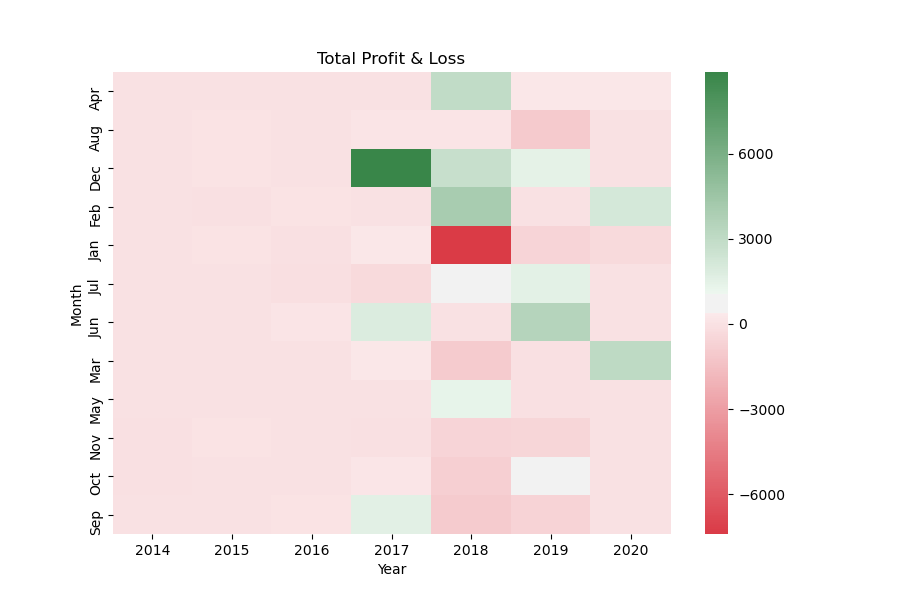

In [96]:
fig, ax = plt.subplots(figsize = (9,6))

df2['Date'] = pd.to_datetime(df2['Date'], errors='coerce')

df2["Year"] = df2['Date'].dt.year

df2["Month"] = df2['Date'].dt.strftime('%b')


dfSeason = pd.pivot_table(df2, index=df2["Month"], columns=df2['Year'],
               values='P/L', aggfunc=np.sum, fill_value=0)

cmap = sns.diverging_palette(10, 133, as_cmap=True)

sns.heatmap(dfSeason, cmap=cmap)
plt.title("Total Profit & Loss")

plt.show()

###  Analyse de la performance :

<IPython.core.display.Javascript object>


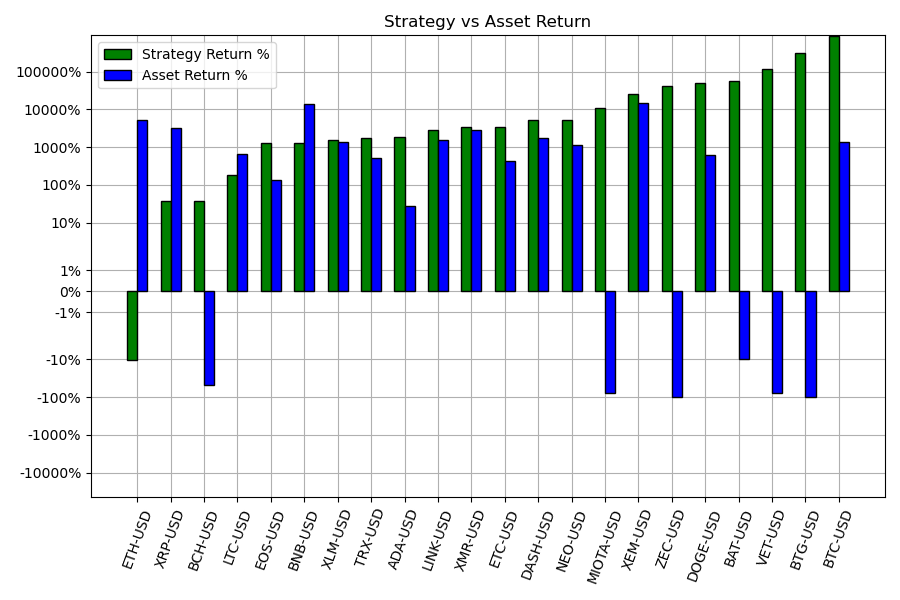

Rendement moyen stratégie = 68825.66618381868 %
Rendement moyen crypto-monnaies = 2225.1625323400876 %


In [90]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize = (9,6))

barWidth = 0.3

labels = df["Ticker"]
a = df['Strategy Return %'].sort_values()*100
b = df['Asset Return %']*100

# Set position of bar on X axis
r1 = np.arange(len(labels))
r2 = [x + barWidth for x in r1]

# Make the plot
ax.bar(r1, a, color='green', width=barWidth, edgecolor='black', label='Strategy Return %', align='edge', zorder=3, 
      linewidth=1)
ax.bar(r2, b, color='blue', width=barWidth, edgecolor='black', label='Asset Return %', align='edge', zorder=3, 
      linewidth=1)

# Add xticks on the middle of the group bars

plt.xticks([r + barWidth for r in range(len(labels))], labels, rotation=70)

plt.title("Strategy vs Asset Return")



plt.yscale("symlog")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
#ax.set_facecolor('#212326')

plt.tight_layout()

ax.grid(zorder=0)

# Create legend & Show graphic
ax.legend()
plt.show()

print("Rendement moyen stratégie = {} %".format(np.mean(df['Strategy Return %'])*100))
print("Rendement moyen crypto-monnaies = {} %".format(np.mean(df['Asset Return %'])*100))

**On peut constater une large surperformance !**


&emsp;
### Analyse du risque :

<IPython.core.display.Javascript object>


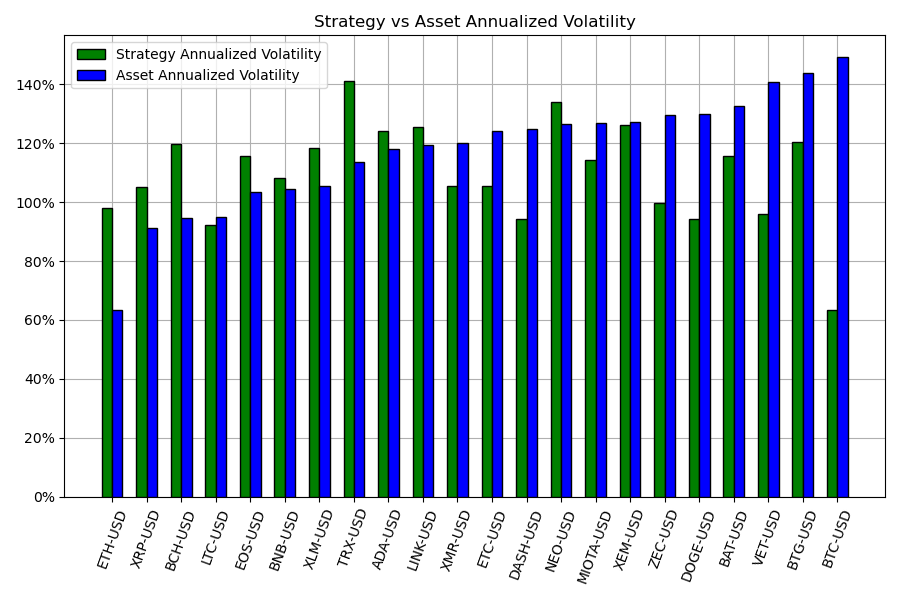

In [91]:
fig, ax = plt.subplots(figsize = (9,6))

barWidth = 0.3

labels = df["Ticker"]
a = df['Strategy Annualized Volatility']*100
b = df['Asset Annualized Volatility'].sort_values()*100

# Set position of bar on X axis
r1 = np.arange(len(labels))
r2 = [x + barWidth for x in r1]

# Make the plot
ax.bar(r1, a, color='green', width=barWidth, edgecolor='black', label='Strategy Annualized Volatility', 
       align='edge', zorder=3, linewidth=1)
ax.bar(r2, b, color='blue', width=barWidth, edgecolor='black', label='Asset Annualized Volatility', 
       align='edge', zorder=3, linewidth=1)

# Add xticks on the middle of the group bars

plt.xticks([r + barWidth for r in range(len(labels))], labels, rotation=70)

plt.title("Strategy vs Asset Annualized Volatility")



#plt.yscale("symlog")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.tight_layout() 

ax.grid()

# Create legend & Show graphic
ax.legend()
plt.show()




<IPython.core.display.Javascript object>


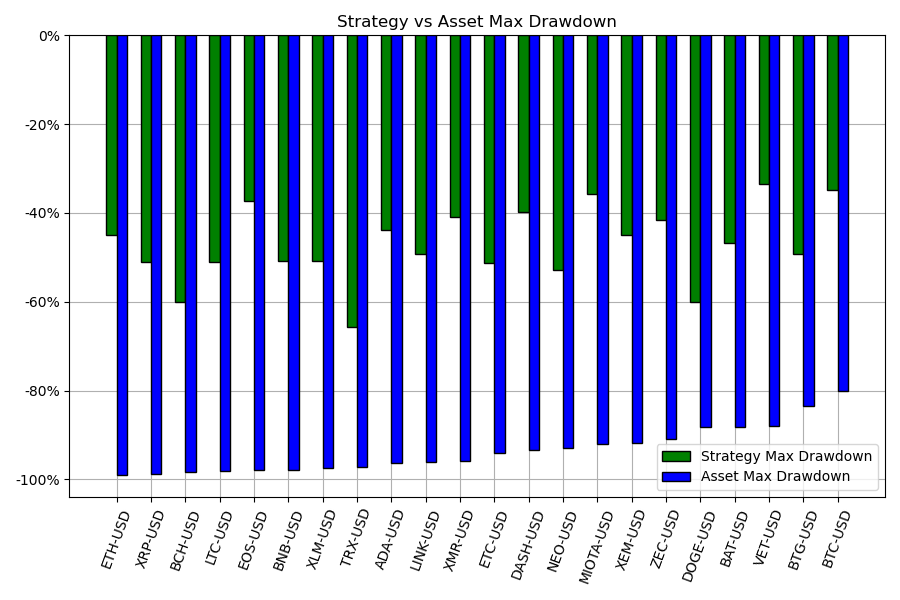

In [92]:
fig, ax = plt.subplots(figsize = (9,6))

barWidth = 0.3

labels = df["Ticker"]
a = df['Strategy Max Drawdown']*100
b = df['Asset Max Drawdown'].sort_values()*100

# Set position of bar on X axis
r1 = np.arange(len(labels))
r2 = [x + barWidth for x in r1]

# Make the plot
ax.bar(r1, a, color='green', width=barWidth, edgecolor='black', label='Strategy Max Drawdown', 
       align='edge', zorder=3, linewidth=1)
ax.bar(r2, b, color='blue', width=barWidth, edgecolor='black', label='Asset Max Drawdown', 
       align='edge', zorder=3, linewidth=1)

# Add xticks on the middle of the group bars

plt.xticks([r + barWidth for r in range(len(labels))], labels, rotation=70)

plt.title("Strategy vs Asset Max Drawdown")



#plt.yscale("symlog")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.tight_layout() 

ax.grid()

# Create legend & Show graphic
ax.legend()
plt.show()


<IPython.core.display.Javascript object>


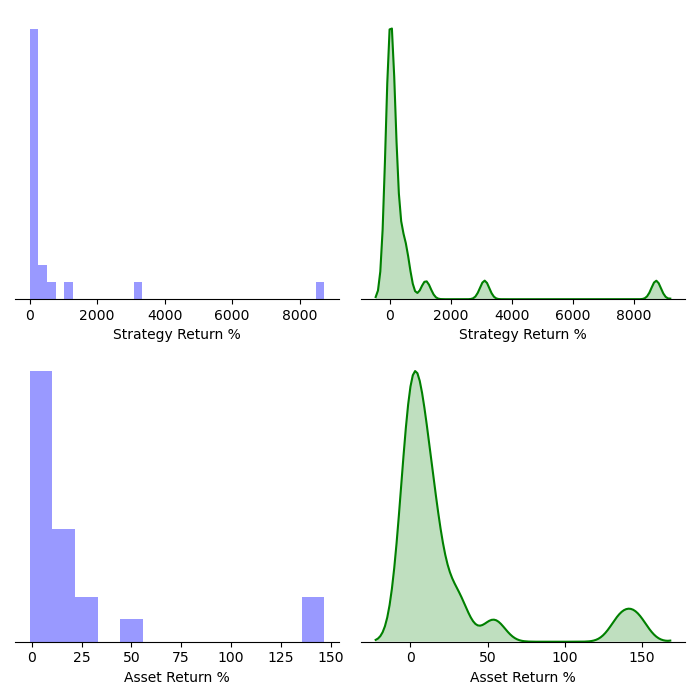

(-1.6437717539342032, 28.86536098395663)

In [93]:
import seaborn as sns
from confInter import confidence_interval
%matplotlib notebook

df["Strategy Return %"] = df["Strategy Return %"].astype(float)
df["Asset Annualized Volatility"] = df["Asset Annualized Volatility"].astype(float)

f, ax = plt.subplots(2, 2, figsize=(7, 7))

#dfForCorr = df[["Strategy Return %", "Asset Return %", "Strategy Max Drawdown"
#                ,"Asset Max Drawdown", "Strategy Annualized Volatility", 
#               "Asset Annualized Volatility"]].astype(float)
#
#plt.xticks(fontsize=6)
#plt.yticks(fontsize=6)


d = df["Strategy Return %"]
# Plot a simple histogram with binsize determined automatically
sns.despine(left=True)

sns.distplot(df["Strategy Return %"], kde=False, color="b", ax=ax[0, 0])
sns.distplot(df["Strategy Return %"], hist=False, color="g", kde_kws={"shade": True}, ax=ax[0, 1])

# Plot a filled kernel density estimate
sns.distplot(df["Asset Return %"], hist=False, color="g", kde_kws={"shade": True}, ax=ax[1, 1])
sns.distplot(df["Asset Return %"], kde=False, color="b", ax=ax[1, 0])

plt.setp(ax, yticks=[])
plt.tight_layout()

confidence_interval(0.95, df["Expectancy"])


### Un des grands gagnants : Basic Attention Token (BAT-USD)

<IPython.core.display.Javascript object>


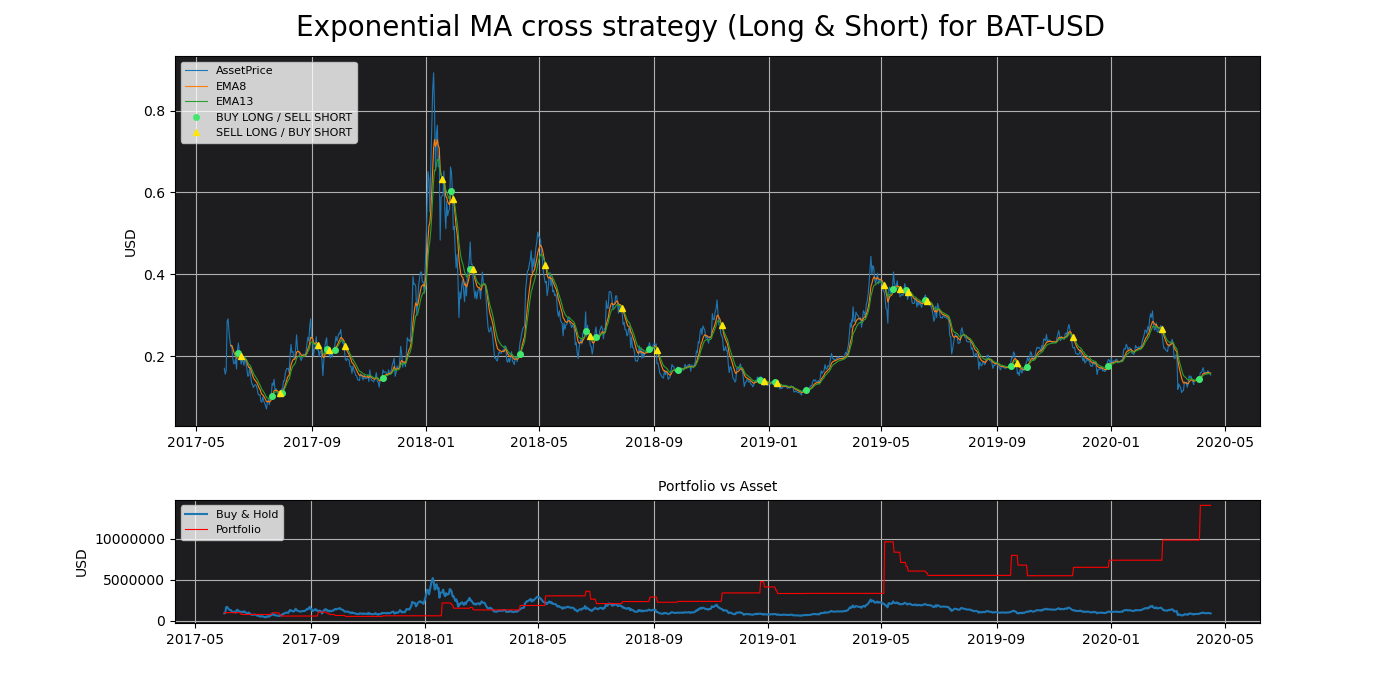

(         From          To   Ticker Number of Trades Winning Trades  \
 1  2017-05-31  2020-04-16  BAT-USD               44             20   
 
   Losing Trades Largest Winning Trade Largest Losing Trade % Profitable  \
 1            24                0.4248              -0.1407       0.4545   
 
   Expectancy Total Realized Return Buy & Hold Return Asset Return %  \
 1  0.0204063           1.30945e+07          -97632.2     -0.0976322   
 
   Strategy Return % Strategy Max Drawdown Asset Max Drawdown Open position  \
 1           13.0945             -0.466919          -0.881678      0.146331   
 
   Open Trade P/L Total Return Strategy Annualized Volatility  \
 1         771140  1.30945e+07                        1.15656   
 
   Asset Annualized Volatility Used Stop-Loss Used Stop-Gain  \
 1                     1.19355              0              0   
 
   Asset Sharpe Ratio Market Exposure Strategy Sharpe Ratio  \
 1         -0.0216409        0.984762            -0.0875873   
 
   Ass

In [94]:
MA_CROSS(["BAT-USD"], 8, 13, "2000-01-01", 
                                       "2020-04-15", ma="exp", 
                                       showplot=True, shortLong="both", 
                                       capital=1_000_000)